In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
live_df = pd.read_csv('random_sample.csv')

In [3]:
live_df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
96,24965357,Skylit Boho Retreat - Wicker Park NO PARTIES,1649647,Bianca,NaN,West Town,41.91162,-87.66674,Entire home/apt,159,2,65,2020-09-06,2.28,5,87
97,42951283,"Bright Gold Coast 1BR w/ Gym, Lounge, nr. Oak ...",107434423,Blueground,NaN,Near North Side,41.89880,-87.62981,Entire home/apt,144,30,0,NaN,NaN,205,0
98,642053,Large Double Queen Studio Apartment in Wicker ...,81779,Laura,NaN,West Town,41.90567,-87.67311,Hotel room,160,2,11,2020-03-08,0.12,11,0
99,7092080,1 BD Luxury Boutique Apartment,24705990,Rick,NaN,Uptown,41.97195,-87.66733,Hotel room,266,3,32,2019-09-17,0.51,12,282
100,43078540,Found Hotel Chicago River North,315027620,Found Hotel Chicago River North,NaN,Near North Side,41.89288,-87.63377,Hotel room,0,1,0,NaN,NaN,1,0


In [4]:
live_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              101 non-null    int64  
 1   name                            101 non-null    object 
 2   host_id                         101 non-null    int64  
 3   host_name                       101 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   101 non-null    object 
 6   latitude                        101 non-null    float64
 7   longitude                       101 non-null    float64
 8   room_type                       101 non-null    object 
 9   price                           101 non-null    int64  
 10  minimum_nights                  101 non-null    int64  
 11  number_of_reviews               101 non-null    int64  
 12  last_review                     85 n

In [6]:
from sqlalchemy import create_engine
host = r'127.0.0.1'
db = r'MSDS610'
user = r'postgres'
pw = r'MSDS610'
port = r'5432'
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

table_name = r'cleaning_reference'
schema = r'cleaned'

clean_ref = pd.read_sql_table(table_name, db_conn, schema)

In [7]:
clean_ref.head(10)

,field,action,values
0,id,drop,None
1,name,drop,None
2,host_id,drop,None
3,host_name,drop,None
4,neighbourhood_group,drop,None
5,last_review,drop,None
6,reviews_per_month,fillna,0
7,neighbourhood,label_encoder,"Archer Heights, 1"
8,room_type,label_encoder,"Entire home/apt, 0"


In [8]:
prepared_live_df = live_df.copy()

In [9]:
from cleaning import preprocess_data
prepared_live_df = preprocess_data(prepared_live_df)

In [10]:
prepared_live_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   101 non-null    int64  
 1   latitude                        101 non-null    float64
 2   longitude                       101 non-null    float64
 3   room_type                       101 non-null    int64  
 4   price                           101 non-null    int64  
 5   minimum_nights                  101 non-null    int64  
 6   number_of_reviews               101 non-null    int64  
 7   reviews_per_month               101 non-null    int64  
 8   calculated_host_listings_count  101 non-null    int64  
 9   availability_365                101 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 8.0 KB


In [11]:
from feature_engineering import feature_engineering
prepared_live_df = feature_engineering(prepared_live_df)

In [12]:
prepared_live_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   101 non-null    int64  
 1   latitude                        101 non-null    float64
 2   longitude                       101 non-null    float64
 3   room_type                       101 non-null    int64  
 4   price                           101 non-null    int64  
 5   minimum_nights                  101 non-null    int64  
 6   number_of_reviews               101 non-null    int64  
 7   reviews_per_month               101 non-null    int64  
 8   calculated_host_listings_count  101 non-null    int64  
 9   availability_365                101 non-null    int64  
 10  neighbourhood_density           101 non-null    int64  
 11  Entire home/apt                 101 non-null    int64  
 12  Private room                    101 

In [13]:
model_path = 'best_model.joblib'
rf_model = joblib.load(model_path)

In [14]:
X_live = prepared_live_df.drop(columns=["price"], errors='ignore')

In [15]:
y_live_pred = rf_model.predict(X_live)

In [16]:
prepared_live_df["predicted_price"] = y_live_pred

In [17]:
live_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              101 non-null    int64  
 1   name                            101 non-null    object 
 2   host_id                         101 non-null    int64  
 3   host_name                       101 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   101 non-null    object 
 6   latitude                        101 non-null    float64
 7   longitude                       101 non-null    float64
 8   room_type                       101 non-null    object 
 9   price                           101 non-null    int64  
 10  minimum_nights                  101 non-null    int64  
 11  number_of_reviews               101 non-null    int64  
 12  last_review                     85 n

In [18]:
live_df['predicted_price'] = prepared_live_df['predicted_price']

In [19]:
live_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,predicted_price
0,40182247,3 bdrm; free internet in pilsen/southloop,306943744,Joe,NaN,Lower West Side,41.85974,-87.65797,Entire home/apt,200,1,1,2020-02-17,0.14,8,365,584.789264
1,45438479,English Lavender Room,258297883,Darkhan,NaN,Humboldt Park,41.88866,-87.71965,Private room,44,1,0,NaN,NaN,3,1,42.593723
2,39793384,ROWULA HOUSE - WARM AFRICAN HOSPITALITY IN CHI...,13784535,Omar,NaN,South Chicago,41.73711,-87.54816,Private room,45,1,1,2020-08-31,1.00,1,357,59.223995
3,35942729,Spacious Sedgwick Condo - Steps to Old Town,200416010,Saul,NaN,Near North Side,41.91054,-87.63743,Entire home/apt,255,3,11,2020-09-07,1.09,6,342,322.534000
4,1468342,Quaint Serenity in Bronzeville,4081052,Suzetta,NaN,Grand Boulevard,41.81266,-87.61586,Private room,55,2,123,2020-02-16,1.42,1,364,63.805856


In [21]:
live_data_with_predictions = 'live_data_with_predictions.csv'
live_df.to_csv(live_data_with_predictions)

In [22]:
table_name = r'live_data_with_predictions'
schema = r'analytic'

live_df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

101

#### HERE IS THE SCREENSHOT OF THE PREDICTED PRICE APPENDED TO THE LIVE RAW DATA AND SAVED INTO THE ANALYTIC SCHEMA.

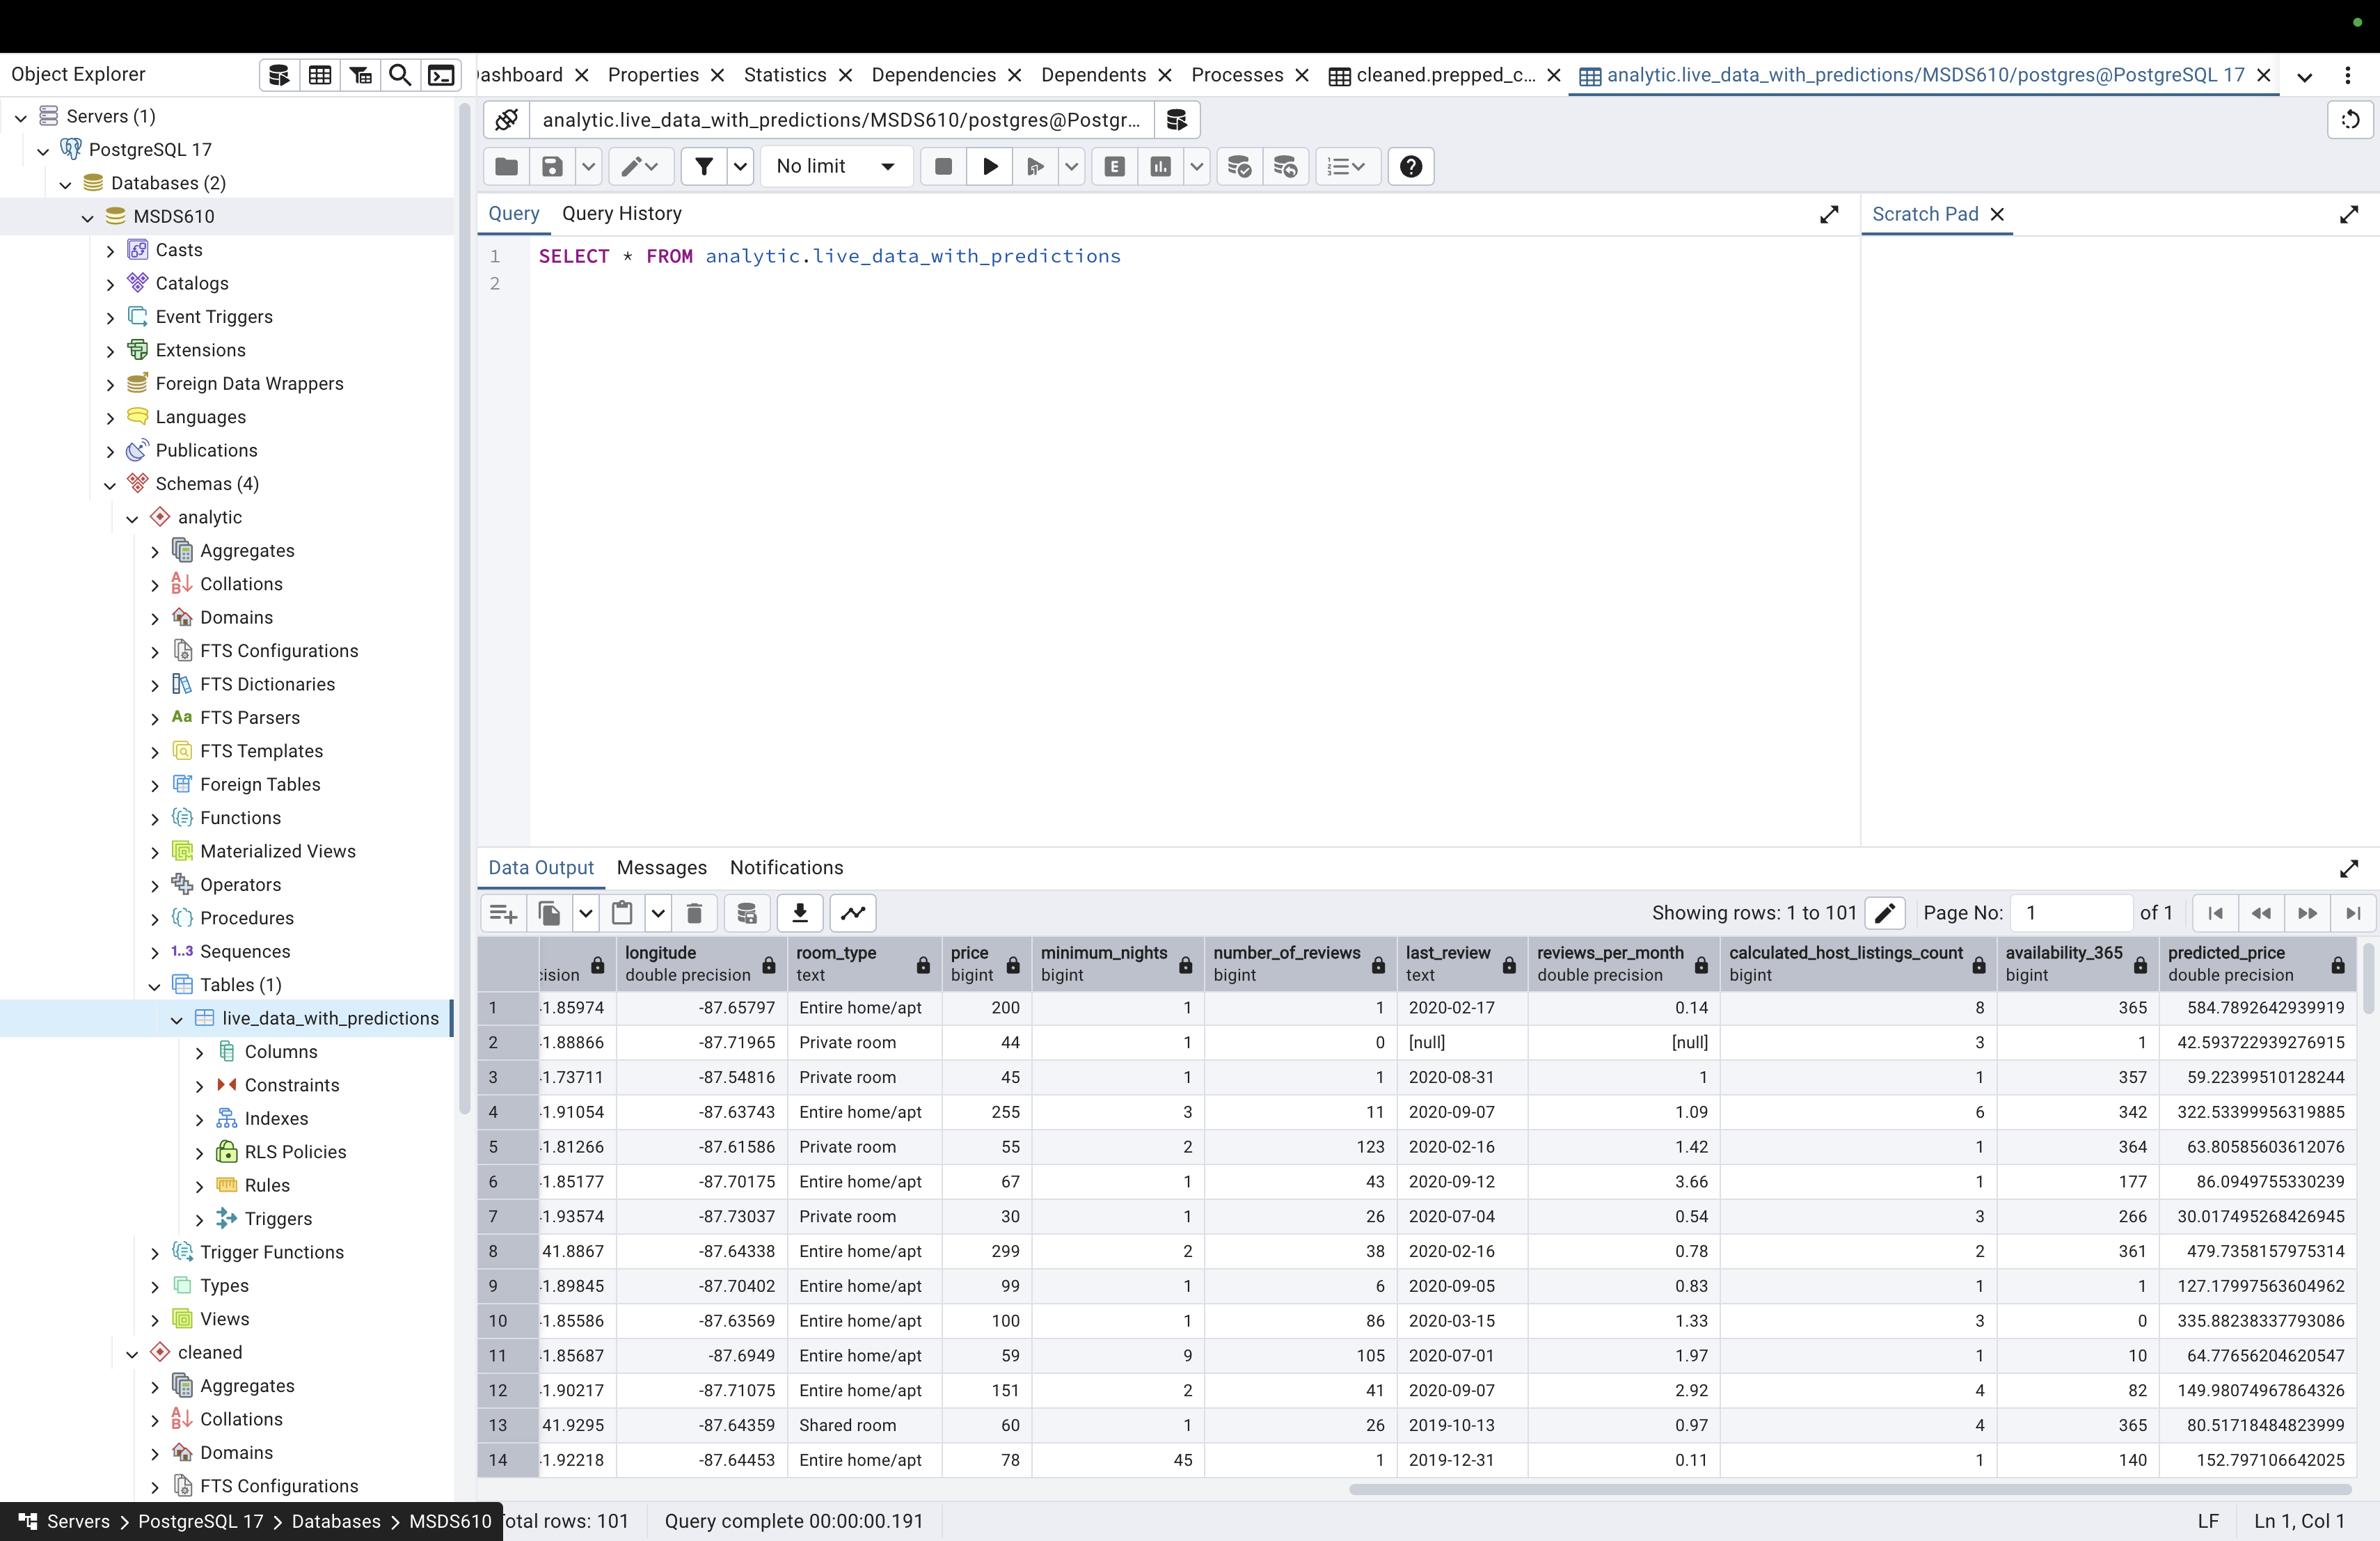

In [25]:
actual_prices = live_df["price"]
predicted_prices = live_df["predicted_price"]

In [32]:

mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

In [31]:
r2 = r2_score(actual_prices, predicted_prices)

In [33]:
print(f"Model Performance Summary:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Performance Summary:
R² Score: 0.9945
Mean Absolute Error (MAE): 72.97
Mean Squared Error (MSE): 15413.53
Root Mean Squared Error (RMSE): 124.15


# PART 9 - INSIGHTS

##### The data set contains both the actual prices (price) and predicted prices (predicted_price), allowing for a full evaluation of model performance. The primary analytical question driving this analysis was: "Can we predict the price of an Airbnb based on the location, room type, and availability?" The model's performance metrics provide strong evidence that the predictive model is very good at answering this question. The R² value tells us how well the variation in the dependent variable is explained by the independent variables. It is very high at 0.9945. This means that 99.45% of the variability in Airbnb prices is explained by the model, meaning that the model is a good fit. The high R² value tells us that chosen features—location, room type, and availability—are strongly associated with Airbnb prices, confirming the analytical concept.
#### Aside from the R² score, other performance metrics confirm how effective the model performs. The Mean Absolute Error (MAE) is 72.97, which means that on average the predicted prices vary by about $73 from actual prices. It is a very low number and suggests that most predictions are very near to actual values. The Mean Squared Error (MSE), which punishes large errors more, is 15413.53. This number may look high, but it represents rare cases with big price differences, and the prediction quality overall remains good. Finally, the Root Mean Squared Error (RMSE), which is the square root of MSE, equals 124.15. RMSE is more interpretable and tells us that the average difference between predicted and real prices is around $124. Given the intrinsic differences in Airbnb prices, this degree of error is reasonable and within acceptable limits for an effective predictive model.
#### In general, these figures indicate that the model is highly precise and reliable to use in order to estimate prices for Airbnb considering location, room type, and availability. The extremely high R² value ensures that the model accurately captures the primary factors responsible for price changes, and the low MAE and RMSE ensure that prediction errors are minor and beneficial to apply in practical applications. This performance shows that the model is viable for helping with pricing strategies, improving listing recommendations, or generating better customer insights in the Airbnb market. Its high accuracy and low margins of error guarantee that this predictive model gives a satisfactory answer to the original question of analysis, showing that Airbnb prices can be predicted with high confidence using the chosen features.

#### Given below are some figures to better illustrate the models performance:

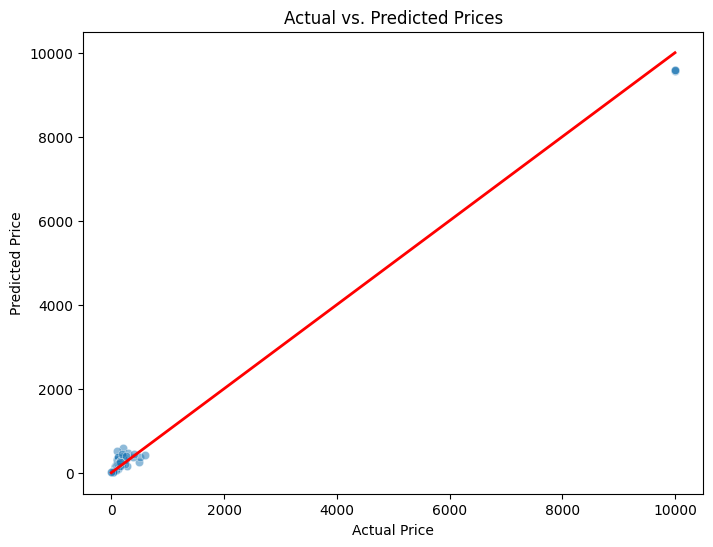

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=actual_prices, y=predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'r', lw=2)  # Perfect predictions line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()


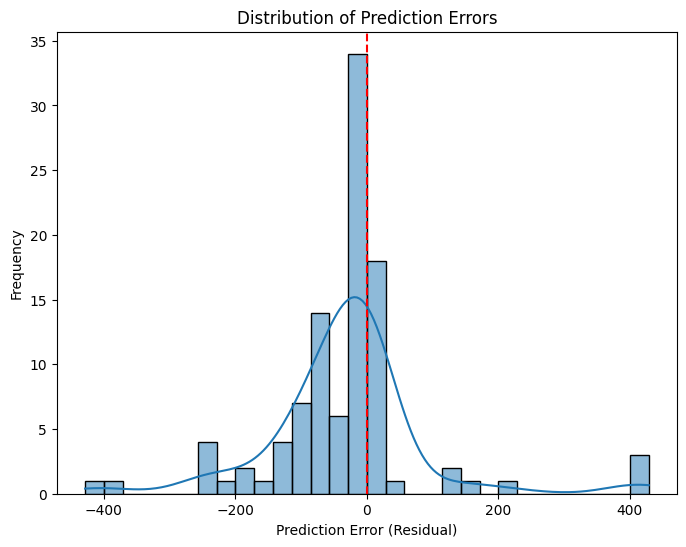

In [27]:
residuals = actual_prices - predicted_prices
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed') 
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

# PART 10 - REFLECTION

#### Looking back at this project, there were definitely times when it felt like a chore. But to be honest, one of the things that I found most enjoyable was data preparation. There is just something satisfying about cleaning up, sorting, and taking dirty data and making it clean and functional. It was like doing a puzzle — once all the pieces fit together, it made the whole process so much simpler. I found myself learning new skills and appreciating the beauty of well-prepared data. Whether it was missing value handling, categorical variable encoding, or feature scaling, each step felt like constructing a solid foundation for the model. Preprocessing provided a sense of control and clarity that made me feel more confident in proceeding. While the data set seemed truly overwhelming at first, separating it out into steps made it progressively easier and even enjoyable to deal with.
#### But despite having good data prep, I also hit some snags in the execution phase. Writing and working with user-defined functions (UDFs) were really tricky. They seemed sort of confusing to do correctly, and I found myself asking myself a lot if I was doing it the "right way." Sometimes I'd write a function that in theory was flawless but completely ruined everything when I attempted to implement it. Working out those bugs was so frustrating, but it made me actually get to grips with the logic at every stage. Then I hit another huge stumbling block when I realized that the amount of features in my training data wasn't corresponding with what I had in my live dataset. I was completely perplexed for a moment until I realized that my live dataset didn't contain any records with "hotel room" as the room type, which was present in my original training data. As soon as I noticed the issue, I adjusted my preprocessing steps and ensured my model could handle the feature discrepancy like a pro. It was a lot of hanging in there and searching through documents, but then everything started falling into place. Even though it was not always easy, I'm actually thankful for the struggle since it made me more patient and more organized with my coding.
##### So, I have to say, this entire experience has been a real eye-opener to what it actually takes to develop and deploy a model in the real world. I've completely gained a new level of appreciation for data scientists — their work isn't all algorithms and coding; it's all about patience, troubleshooting, and continuously learning. Seeing how all of it comes together, from data collection to preprocessing to building the model and evaluating its performance, made me have a far greater appreciation of the work that goes into it. There really is an art to balancing technical capability with strategic thought, and this project made me realize that. While the process was not always easy, I am pleased with what I was able to accomplish and feel more confident in my skills moving forward. Truthfully, this project taught me that difficulties are just part of the journey — and overcoming them makes the end result feel so much more satisfying.